<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Introduction to Numerical Methods in Python

Draga Pihler-Puzovic  
(c) University of Manchester  
January 2021

As usual, we first initialise our Python interpreter:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## Numerical Integration

Here we are inegrating $\textrm{d} y/\textrm{d} t= 2t$ numerically, assuming $y(t=0)=0$, to find its value at $t_m=3$.

We approximate the integral $y$ by performing a sum of $\delta y = h (\textrm{d} y/\textrm{d} t)$, with some chosen value of $h$, where $h$ is a step in $t$ and $\textrm{d} y/\textrm{d} t$ is the *gradient* of the function $y$. Try experimenting with different values of $h$:

In [28]:
# Define step size
h = 0.2
# Define limit of integration
t_m = 3
# Define initial value of integral (zero)
y_int = 0
# Define some y_int_vals that are the intermediate integral values; the first value (at t = 0) is zero
y_int_vals = np.array([0])
# Create values of t in steps of h
for t in np.arange(0,t_m,h):
    # For each value of t, add the corresponding value dy/dt * h
    y_int = y_int + h * (2*t)
    # Append the current y_int value to the array of intermediate values
    y_int_vals = np.append(y_int_vals,y_int)
# The final value of y_int is the numerical approximation

# Calculate analytical integral for comparison
y_ana = t_m**2
print('Analytical integral is {:04.10f}'.format(y_ana))
print('Numerical integral is {:04.10f}'.format(y_int))

Analytical integral is 9.0000000000
Numerical integral is 8.4000000000


We see that as $h$ gets larger, we have fewer points and a worse approximation. We can plot how the numerical integral compares to the true integral:

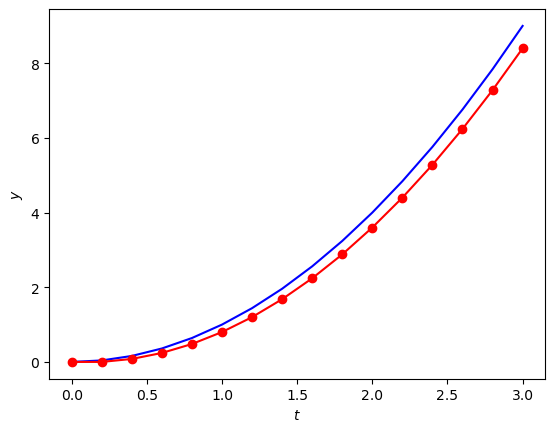

In [32]:
# Create some t values (just for plotting) - we need one extra one to match the number of y values we have
t = np.arange(0,t_m+h,h)
# Make some analytical y values:
y_ana_vals = t**2
plt.plot(t,y_ana_vals,'b') # True integral in blue
plt.plot(t,y_int_vals,'-ro') # Numerical approximation in red, showing the individual steps

plt.xlabel("$t$")
plt.ylabel("$y$")

plt.show()

We see that there is a small difference in the two integrals (analytical and numerical), that depends on $h$.

![](./img/bee.png)
## Euler's Method

Let's implement the method for a spring-mass system described by the equation of motion  
$ m a = - k x + b v $  
for some mass $m$, spring constant $k$ and damping constant $b$. Here, velocity and acceleration are obviously 
$v = \frac{\textrm{d} x}{\textrm{d} t}$ and $a = \frac{\textrm{d} v}{\textrm{d} t}$, and system is subject to some initial conditions 𝑥(𝑡=0) and 𝑣(𝑡=0).

Assuming h is a small *time step*, the **Euler's Method** is 
$$x_{i+1} = x_{i} + h \cdot v_{i}$$ 
$$v_{i+1} = v_{i} + h \cdot a_{i}$$    
where  
$$a_{i} = -(k/m) x_{i} -(b/m) v_{i}$$. Here $i$ labels the number of steps taken (each of size $h$ in time). This allows us to model the system over some specified time from $t =0$ to $t=T$.  

Let's implement Euler's method in code. We just copy the lines from above:

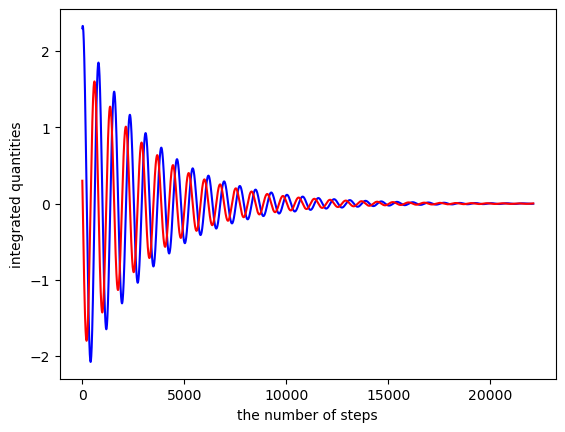

In [37]:
# Choose some physics parameters 
m = 1.2 #in kg
k = 0.8 #in kg/s^2
b = 0.08 #in kg/s
# Choose how long we are integrating for (in s)
T = 221
# Choose the step size (in s)
h = 0.01
# Determine how many steps there are (values of i); we need to use int to ensure we have a whole number
# of them, otherwise the loops won't work
nsteps = int(T/h)
# Create empty arrays ready for the values of x and v
x = np.zeros(nsteps)
v = np.zeros(nsteps)
# Choose some initial conditions
x[0] = 2.3 # in m
v[0] = 0.3 # in m/s
for i in range(nsteps-1):
    # Calculate the acceleration at step i (in m/s)
    # Notice we don't make an array of these, as we usually don't need to remember them all
    a = -(k/m)*x[i] - (b/m)*v[i]
    # For each configuration at step i, calculate x (in m) and v (in m/s) for the later step i+1
    x[i+1] = x[i] + v[i]*h
    v[i+1] = v[i] + a*h
# Plot the positions and velocities on the same axes
plt.plot(x,'b')
plt.plot(v,'r')
plt.xlabel("the number of steps")
plt.ylabel("integrated quantities")

plt.show()

Let's also plot  𝑥  and  𝑣  against each other because it is easy:

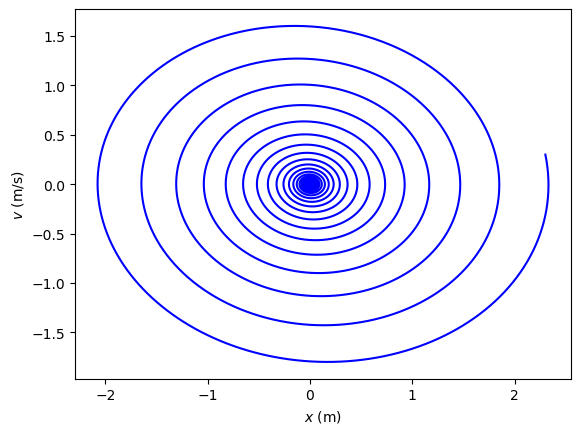

In [39]:
plt.plot(x,v,'b')
plt.xlabel("$x$ (m)")
plt.ylabel("$v$ (m/s)")

plt.show()

Let's apply the Euler's method for a range of step sizes and plot the outcome of this calculation & the corresponding analytical solution. This time, we will use a function to code up the method.

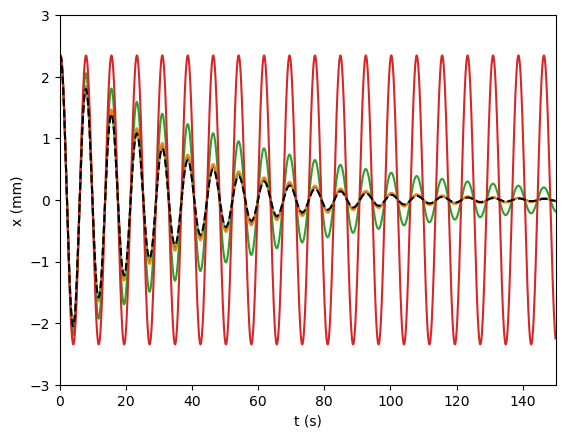

In [28]:
import cmath


# The method implementation
def EulerMethod(x0, v0, nsteps, hstep):
    # Create empty arrays ready for the values of x and v
    x = np.zeros(nsteps)
    v = np.zeros(nsteps)

    # Assign initial conditions
    x[0] = x0 
    v[0] = v0

    for i in range(nsteps-1):

        # Calculate the acceleration at step i (in m/s)
        #Notice we don't make an array of these, as we usually don't need to remember them all
        a = -(k/m)*x[i] - (b/m)*v[i]
        # For each configuration at step i, calculate x (in m) and v (in m/s) for the later step i+1
        x[i+1] = x[i] + v[i]*hstep
        v[i+1] = v[i] + a*hstep
        
    return (x, v) 

# The analytic solution when b is not b_cr
def Analytic(x0, v0, time):
    # Constants
    A = (b/(2*1j*cmath.sqrt(4*k*m-b**2))+1/2)*x0+v0*m/(cmath.sqrt(4*k*m-b**2)*1j) 
    B = x0-A
    
    X = np.exp(-b*time/(2*m))*(A*np.exp(1j*cmath.sqrt(4*k*m-b**2)*time/(2*m))
                              +B*np.exp(-1j*cmath.sqrt(4*k*m-b**2)*time/(2*m)))

    return X

# Choose the same physics parameters as above 
m = 1.2 #in kg
k = 0.8 #in kg/s^2
b = 0.08 #in kg/s
# and the some initial conditions
x0 = 2.3 # in m
v0 = 0.3 # in m/s
# Choose how long we are integrating for (in s)
T = 150
# Choose a range of step sizes (in s)
h = (0.005, 0.01, 0.05, 0.1)

# Finding the solution for a range of step sizes 
for hstep in h:
    # Determine how many steps there are (values of i); we need to use int to ensure we have a whole number
    # of them, otherwise the loops won't work
    nsteps = int(T/hstep)
    # call the iterative method 
    (x, v) = EulerMethod(x0, v0, nsteps, hstep)
    # plot the outcome by displaying the position only 
    plt.plot(np.arange(0,T,hstep), x)

# plot the analytic solution  
plt.plot(np.arange(0,T,hstep), Analytic(x0, v0, np.arange(0,T,hstep)).real, 'k--')

# labeling plot 
plt.xlabel("t (s)")
plt.ylabel("x (mm)")

# setting the range displayed
plt.xlim(0, 150)
plt.ylim(-3, 3)

plt.show()

Let's now select a range of b values for which the system is underdamped and fix h=0.005 (the numerical solution above agrees with the analytical solution).

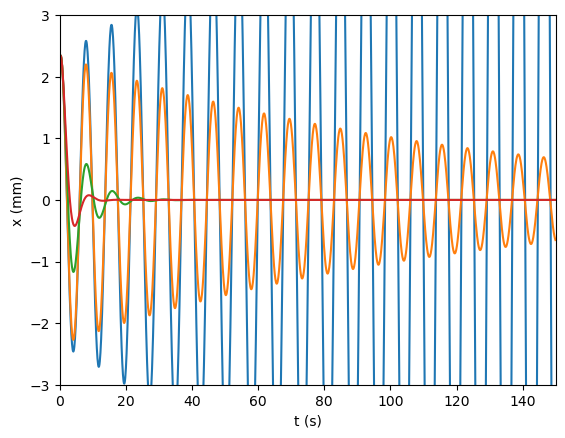

In [20]:
# A range of b values
B = (0.05, 0.1, 0.5, 1) #in kg/s 
# Fixing the time step
h = 0.005
# Determine how many steps there are (values of i); we need to use int to ensure we have a whole number
# of them, otherwise the loops won't work
nsteps = int(T/hstep)

for b in B:
    # call the iterative method 
    (x, v) = EulerMethod(x0, v0, nsteps, hstep)
    # plot the outcome by displaying the position only 
    plt.plot(np.arange(0,T,hstep), x)

# labeling plot 
plt.xlabel("t (s)")
plt.ylabel("x (mm)")

# setting the range displayed
plt.xlim(0, 150)
plt.ylim(-3, 3)

plt.show()

Let's now consider the specific case of b=0 (no damping). We expect self-sustained oscillations (energy is conserved).

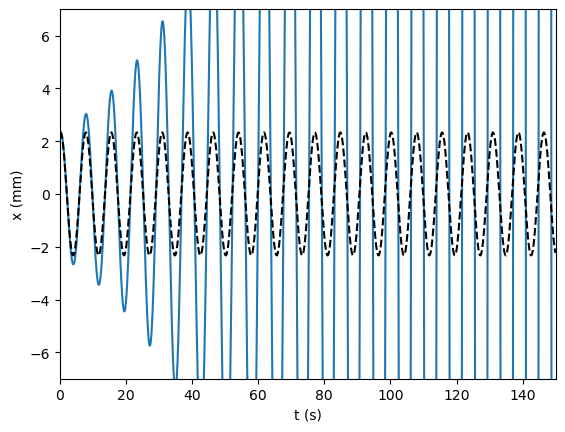

In [23]:
# No damping 
b = 0
# Fixing the time step
h = 0.005
# Determine how many steps there are (values of i); we need to use int to ensure we have a whole number
# of them, otherwise the loops won't work
nsteps = int(T/hstep)

# call the iterative method 
(x, v) = EulerMethod(x0, v0, nsteps, hstep)
# plot the outcome by displaying the position only 
plt.plot(np.arange(0,T,hstep), x)
# plot the analytic solution for comparison
plt.plot(np.arange(0,T,hstep), Analytic(x0, v0, np.arange(0,T,hstep)).real, 'k--')

# labeling plot 
plt.xlabel("t (s)")
plt.ylabel("x (mm)")

# setting the range displayed
plt.xlim(0, 150)
plt.ylim(-7, 7)

plt.show()